# Neural networks

<img src="figs/neurons.png" width=800px>

<img src="figs/analogy.png" width=500px>

<img src="figs/neural_network.png" width=300px>

<img src="figs/karpathy-network.png" width=500px>



# Perceptron-Forward Pass

<img src="figs/fwdpass.png" width=500px>

## Implement an AND gate using NN

In [6]:
"""
AND gate
"""
import pandas as pd

weight1 = 0.5
weight2 = 0.5
bias = -1

# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))



Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                  -1.0                    0          Yes
      0          1                  -0.5                    0          Yes
      1          0                  -0.5                    0          Yes
      1          1                   0.0                    1          Yes


## Implement NOT gate

Ignore the Input 1

In [7]:
"""
Unlike the other perceptrons we looked at, the NOT operations only cares about one input. 
The operation returns a 0 if the input is 1 and a 1 if it's a 0. 
The other inputs to the perceptron are ignored.
In this quiz, you'll set the weights (weight1, weight2) and bias bias 
to the values that calculate the NOT operation on the second input and ignores the first input.
"""
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 0
weight2 = -2
bias = 1.0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))


Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                   1.0                    1          Yes
      0          1                  -1.0                    0          Yes
      1          0                   1.0                    1          Yes
      1          1                  -1.0                    0          Yes


## Activation function

Sigmoid activation function:

$ g(x) = \frac{1}{1+e^{-x}} $

### Derivative of Activation function

$\frac{d}{dx} g(x) = \frac{e^{-x}}{(1+e^{-x})^2} = \frac{1}{1+e^{-x}}\times(1-\frac{1}{1+e^{-x}}) $

$\frac{d}{dx} g(x) = g(x)\times (1-g(x)) $

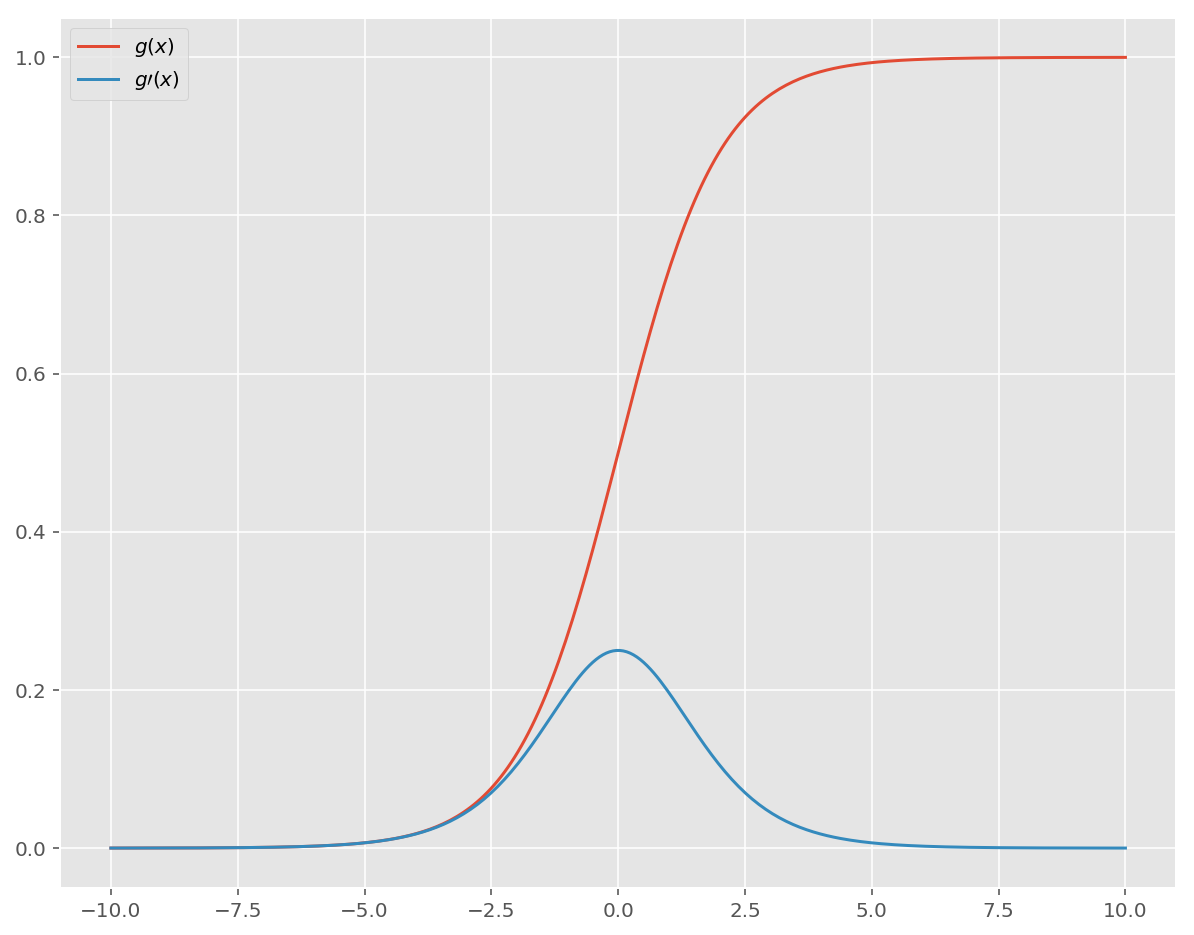

In [15]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.figure(figsize=(10,8))

def sigmoid(x):
    return 1./(1+np.exp(-x)) 

x=np.linspace(-10,10,300)

plt.plot(x,sigmoid(x),label=r'$g(x)$')

def derivative_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x)) 

plt.plot(x,derivative_sigmoid(x),label=r'$g\prime(x)$')
plt.legend()

Other activation functions include, $tanh$, rectified linear units (`relu`) etc.

In [16]:
inputs = np.array([0.7, -0.3])
weights = np.array([0.1, 0.8])
bias = -0.1

output = sigmoid(np.dot(inputs,np.transpose(weights))+bias)

print('Output:')
print(output)

Output:
0.432907095035


# Multilayer perceptron


In [18]:
# Network size
N_input = 4
N_hidden = 3
N_output = 2

np.random.seed(42)
# Make some fake data
X = np.random.randn(4)

# Initializing the weights from the normal distribution
weights_input_to_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
weights_hidden_to_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))


# Make a forward pass through the network

hidden_layer_in = np.dot(X,weights_input_to_hidden)
hidden_layer_out = sigmoid(hidden_layer_in)

print('Hidden-layer Output:')
print(hidden_layer_out)

output_layer_in = np.dot(hidden_layer_out,weights_hidden_to_output)
output_layer_out = sigmoid(output_layer_in)

print('Output-layer Output:')
print(output_layer_out)

Hidden-layer Output:
[ 0.41492192  0.42604313  0.5002434 ]
Output-layer Output:
[ 0.49815196  0.48539772]


### Find if a student is admitted or not?

In [24]:
admissions = pd.read_csv('../data/binary.csv')

# Make dummy variables for rank
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
data = data.drop('rank', axis=1)

# Standarize features
for field in ['gre', 'gpa']:
    mean, std = data[field].mean(), data[field].std()
    data.loc[:,field] = (data[field]-mean)/std
    
# Split off random 10% of the data for testing
np.random.seed(42)
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
data, test_data = data.ix[sample], data.drop(sample)

# Split into features and targets
features, targets = data.drop('admit', axis=1), data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']


# Use to same seed to make debugging easier
np.random.seed(42)

n_records, n_features = features.shape
last_loss = None

# Initialize weights
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

# Neural Network hyperparameters
epochs = 10000
learnrate = 0.5

for e in range(epochs):
    del_w = np.zeros(weights.shape)
    for x, y in zip(features.values, targets):
        # Loop through all records, x is the input, y is the target

              
        output = sigmoid(np.dot(x,np.transpose(weights))) # This is a single value

        error = y-output

        
        error_term = learnrate*error*output*(1-output)

        del_w += error_term

    # TODO: Update weights using the learning rate and the average change in weights
    weights += del_w*x

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        out = sigmoid(np.dot(features, weights))
        loss = np.mean((out - targets) ** 2)
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss


# Calculate accuracy on test data
tes_out = sigmoid(np.dot(features_test, weights))
print (tes_out)
predictions = tes_out > 0.5
print (predictions)
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Train loss:  0.391637168127
Train loss:  0.448051788449   WARNING - Loss Increasing
Train loss:  0.448179081042   WARNING - Loss Increasing
Train loss:  0.448183612163   WARNING - Loss Increasing
Train loss:  0.448183778567   WARNING - Loss Increasing
Train loss:  0.448183784685   WARNING - Loss Increasing
Train loss:  0.44818378491   WARNING - Loss Increasing
Train loss:  0.448183784918   WARNING - Loss Increasing
Train loss:  0.448183784918   WARNING - Loss Increasing
Train loss:  0.448183784918   WARNING - Loss Increasing
[  5.70810284e-26   1.00000000e+00   1.29964707e-64   1.00000000e+00
   1.00000000e+00   2.06671935e-25   1.81135986e-73   9.99999300e-01
   3.29688939e-39   3.57372308e-42   4.06340126e-25   3.00590291e-49
   4.12853135e-03   1.61995766e-27   4.03743804e-36   1.87408416e-08
   1.00000000e+00   1.08491458e-11   3.96850629e-22   2.37933160e-18
   1.61246673e-18   1.00000000e+00   1.00000000e+00   7.21038824e-08
   2.85109879e-01   1.00000000e+00   1.00000000e+00   1

## With back-propagation
